In [1]:
# Get the data from file and split into titles and texts
data = open('Poems.txt', encoding="utf8").read() 
line_by_line = data.split('\n')
titles = []
texts = []
text = ""
for idx, line in enumerate(line_by_line):
    completed = False
    if line.startswith('\"'):
        titles.append(line)
        completed = True
        if completed == True and idx != 0:
            texts.append(text)
            text = ""
    elif not line.startswith('by'):
        text += line + "\n"     

print(titles)
print(texts)

['"SONNET XVIII"', '"SONNET LXV"', '"SONNET CXVI"', '"Auguries of Innocence"', '"The Marriage of Heaven and Hell"', '"When I Heard the Learn’d Astronomer"', '"O Captain! My Captain!"', '"CLANCY OF THE OVERFLOW"', '"SONG OF THE ARTESIAN WATER"', '"STOPPING BY WOODS ON A SNOWY EVENING"', '"FIRE AND ICE"', '"WE REAL COOL"', '"THE BEAN EATERS"', '"THE NEGRO SPEAKS OF THE RIVERS"', '"DREAM DEFERRED"', '"LES FEUILLES MORTES"', '"FAMILY LIFE"', '"BREAKFAST"', '"CHARLIE PARKER"', '"CONEY ISLAND OF THE MIND #5"', '"A SUPERMARKET IN CALIFORNIA"', '"AMERICA"', '"FREDERICK DOUGLASS"', '"AMERICAN HISTORY"', '"DEAR JOHN, DEAR COLTRANE"', '"THE ROCK CRIES OUT TO US TODAY"', '"THE BRIDGE"', '"A WAS AN ARCHER"', '"AS WET AS A FISH"', '"THE FATHER\'S TREASURE"', '"FOR WANT OF A NAIL"', '"HORSE SENSE"', '"IF ALL THE SEAS WERE ONE SEA"', '"LIVING" ', '"THE HAPPY LIFE"', '"MY MIND TO ME A KINGDOM IS"', '"THE CORN" ', '"WHEN IN DISGRACE... "', '"THE MAN OF LIFE UPRIGHT"', '"SONG IN TIME OF PLAGUE"', '"A HAP

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import matplotlib.pyplot as plt
import os


# Tokenize the texts and the titles
tokenizer = Tokenizer()
tokenizer.fit_on_texts(titles + texts)
# Gets the number of unique words 
vocab_size = len(tokenizer.word_index) + 1

# Prepare input sequences
sequences = []
for title, text in zip(titles, texts):
    sequence = tokenizer.texts_to_sequences([title + " " + text])[0]
    for i in range(1, len(sequence)):
        sequences.append(sequence[:i + 1])

# Pad sequences with zeroes
max_sequence_len = max(len(x) for x in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

# Features and labels
X = padded_sequences[:, :-1]
y = tf.keras.utils.to_categorical(padded_sequences[:, -1], num_classes=vocab_size)


In [3]:

# Build the RNN model with LSTM layers
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_len - 1),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(128, activation="relu"),
    Dense(vocab_size, activation="softmax"),
])

# Define Checkpoint callback to save best model
callback_path = "checkpoint_3.keras"
callback_dir = os.path.dirname(callback_path)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=callback_path, monitor='loss',
                                                 save_best_only=True,
                                                 verbose=1)

# Define EarlyStopping callback to stop training when peak is reached
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',         
    patience=5,                 
    restore_best_weights=True   
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model on the data
model_history = model.fit(X, y, epochs=100, verbose=1, callbacks=[checkpoint_callback, early_stopping_callback])
model.save('third_model.keras')

c:\Users\wilma\OPA23HA\Examensarbete\Wave_height\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0601 - loss: 7.0880
Epoch 1: loss improved from inf to 6.86789, saving model to checkpoint_3.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 1126s 2s/step - accuracy: 0.0601 - loss: 7.0877
Epoch 2/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0646 - loss: 6.4084
Epoch 2: loss improved from 6.86789 to 6.44215, saving model to checkpoint_3.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 1263s 2s/step - accuracy: 0.0646 - loss: 6.4085
Epoch 3/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0689 - loss: 6.2389
Epoch 3: loss improved from 6.44215 to 6.25804, saving model to checkpoint_3.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 1452s 2s/step - accuracy: 0.0689 - loss: 6.2390
Epoch 4/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0764 - loss: 6.1110
Epoch 4: loss improved from 6.25804 to 6.11402, saving model to checkpoint_3.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 1493s 2s/step - accuracy: 0.0764 - loss: 6.1110
Epoch 5/100
668/668 

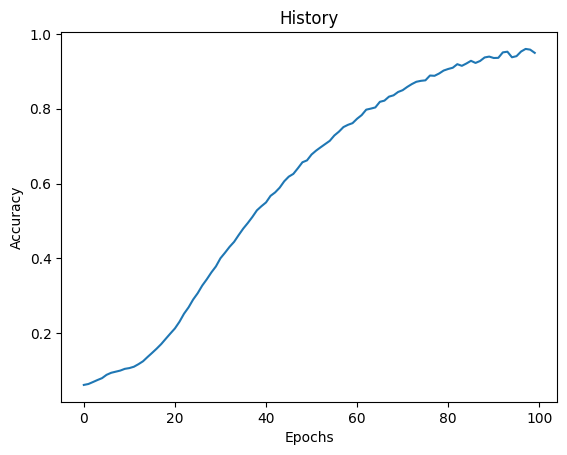

In [4]:
plt.plot(model_history.history['accuracy'])
plt.title('History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [8]:
# Text generation function
def generate_text(title, max_length=20):
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([title])[0]
        padded = pad_sequences([sequence], maxlen=max_sequence_len - 1, padding="pre")
        predicted = model.predict(padded, verbose=0)
        next_word_index = np.argmax(predicted)
        next_word = tokenizer.index_word.get(next_word_index, "")
        if not next_word:
            break
        title += " " + next_word
        if next_word == ".":
            break
    return title

# Test the text generation
generated_text = generate_text("Once upon", max_length=50)
print(generated_text)

Once upon the coffee little faces shall never tongues amid the mighty gloom of golden of my mind he shall pass away not what you may be god when all you for putting your island when my mother at that charlie parker witness with light to pleasant here to pace or o'er
